In [0]:
import os
import numpy as np
from PIL import Image
import cv2


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import ReLU
from tensorflow.keras import optimizers
import librosa
import librosa.display
import pylab
import matplotlib.pyplot as plt
from matplotlib import figure
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train = np.load('drive/My Drive/train.npy')
test = np.load('drive/My Drive/test.npy')
train_labels = np.load('drive/My Drive/train_labels.npy')
test_labels = np.load('drive/My Drive/test_labels.npy')

In [0]:
one_hot_labels_train = keras.utils.to_categorical(np.array(train_labels), num_classes=8)
one_hot_labels_test = keras.utils.to_categorical(np.array(test_labels), num_classes=8)

In [0]:
model = Sequential([
    Conv2D(30, kernel_size=(11, 11), strides=4, padding='same', activation='relu', input_shape=(256, 256, 1)),#C1
    ReLU(max_value=None, negative_slope=0.0, threshold=0.0),
    MaxPooling2D(pool_size=(3, 3), strides=2, padding='valid', data_format=None),
    Conv2D(64, kernel_size=(5, 5), strides=1, padding='same', activation='relu'),#C2
    Conv2D(96, kernel_size=(3, 3), strides=1, padding='same', activation='relu'),#C3
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5, noise_shape=None, seed=None),
    Dense(512, activation='relu'),
    Dropout(0.5, noise_shape=None, seed=None),
    Dense(8, activation='sigmoid')
    # put 6(no. of output)
])

In [0]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Train on 1560 samples, validate on 476 samples
Epoch 1/100
1560/1560 [==============================] - 2s 1ms/sample - loss: 2.0569 - acc: 0.1513 - val_loss: 2.0412 - val_acc: 0.1513
Epoch 2/100
1560/1560 [==============================] - 1s 812us/sample - loss: 2.0472 - acc: 0.1583 - val_loss: 2.0395 - val_acc: 0.1513
Epoch 3/100
1560/1560 [==============================] - 1s 793us/sample - loss: 2.0428 - acc: 0.1596 - val_loss: 2.0388 - val_acc: 0.1513
Epoch 4/100
1560/1560 [==============================] - 1s 809us/sample - loss: 2.0407 - acc: 0.1481 - val_loss: 2.0390 - val_acc: 0.1471
Epoch 5/100
1560/1560 [==============================] - 1s 791us/sample - loss: 2.0449 - acc: 0.1513 - val_loss: 2.0431 - val_acc: 0.1618
Epoch 6/100
1560/1560 [==============================] - 1s 838us/sample - loss: 2.0376 - acc: 0.1481 - val_loss: 2.0371 - val_acc: 0.1975
Epoch 7/100
1560/1560 [==============================] - 1s 819us/sample - loss: 2.0373 - acc: 0.1583 - val_loss: 2.0366 

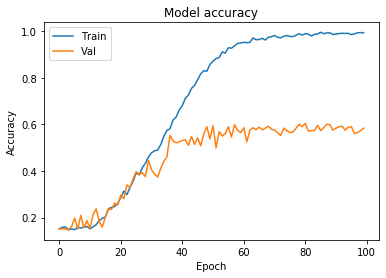

In [77]:
history = model.fit(np.array(train).reshape(len(train),256,256,1),one_hot_labels_train, epochs=100, batch_size=16, validation_data = (np.array(test).reshape(len(test),256,256,1),one_hot_labels_test), shuffle = True)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

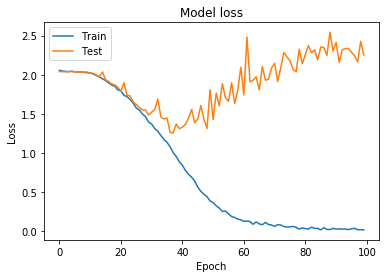

In [78]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

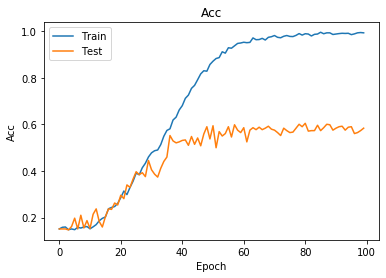

In [79]:
# Plot training & validation acc
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Acc')
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
y_pred = model.predict(np.array(test).reshape(len(test),256,256,1))

In [0]:
C = tf.math.confusion_matrix(
    np.array(test_labels),
    np.argmax(y_pred, axis = -1),
    num_classes=8,
    weights=None,
    dtype=tf.dtypes.int64,
    name=None
)

In [82]:
with tf.Session():
   print('Confusion Matrix: \n\n', tf.Tensor.eval(C,feed_dict=None, session=None))

Confusion Matrix: 

 [[21  2  0 11  1  1  0  0]
 [ 1 50  0 17  1  3  0  0]
 [ 0  7 25  7 12 13  2  6]
 [ 5  6  3 41  6  6  3  2]
 [ 1  0  5  3 54  4  2  3]
 [ 0  1  4 16  4 39  2  6]
 [ 1  0  0  0  7  0 31  1]
 [ 1  0  1  2  1 12  6 17]]


In [85]:
from sklearn.preprocessing import normalize
with tf.Session():
  m = normalize(tf.Tensor.eval(C,feed_dict=None, session=None), axis=1, norm='l1')
m

array([[0.58333333, 0.05555556, 0.        , 0.30555556, 0.02777778,
        0.02777778, 0.        , 0.        ],
       [0.01388889, 0.69444444, 0.        , 0.23611111, 0.01388889,
        0.04166667, 0.        , 0.        ],
       [0.        , 0.09722222, 0.34722222, 0.09722222, 0.16666667,
        0.18055556, 0.02777778, 0.08333333],
       [0.06944444, 0.08333333, 0.04166667, 0.56944444, 0.08333333,
        0.08333333, 0.04166667, 0.02777778],
       [0.01388889, 0.        , 0.06944444, 0.04166667, 0.75      ,
        0.05555556, 0.02777778, 0.04166667],
       [0.        , 0.01388889, 0.05555556, 0.22222222, 0.05555556,
        0.54166667, 0.02777778, 0.08333333],
       [0.025     , 0.        , 0.        , 0.        , 0.175     ,
        0.        , 0.775     , 0.025     ],
       [0.025     , 0.        , 0.025     , 0.05      , 0.025     ,
        0.3       , 0.15      , 0.425     ]])